# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [28]:
import pandas as pd
import numpy as np
import requests
import json as js
import matplotlib.pyplot as plt 
% matplotlib inline

In [29]:
#read twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
twitter_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [31]:
#import image_predictions.tsv
predicted_breeds_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predicted_breeds_url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
# Import predicted breeds file
image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')

In [32]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
image_predictions.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [34]:
#Gather each tweet's retweet count and favorite ("like") count 

tweets = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweet = js.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        tweets.append({'tweet_id':tweet_id,
                      'retweet_count': retweet_count,
                      'favorite_count': fav_count,
                      'user_count': user_count})

In [35]:
tweet_json = pd.DataFrame(data=tweets)
tweet_json.head()

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889


In [36]:
tweet_json.shape

(2354, 4)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [37]:
#first we will perform a visual assessment by displaying the data of our three dataframes and scrolling down.
#we will check them in Excel as well
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [38]:
#twitter_archive info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [39]:
#twitter_archive unique values per column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [40]:
#check what are the unique values in the columns doggo, floofer, pupper and puppo
print(twitter_archive.doggo.unique())
print(twitter_archive.floofer.unique())
print(twitter_archive.pupper.unique())
print(twitter_archive.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [41]:
#As I expected only 10 as denominator, let's check what other demoninators we get
print(twitter_archive.rating_denominator.unique())

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


In [42]:
#Let's check the columns with the greatest number of nulls
twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [43]:
#Now let's check image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [44]:
#Let's check duplicates in this file
duplicate_predictions = image_predictions[image_predictions.duplicated(['tweet_id'])]
duplicate_predictions 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
#Now let's check info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
#Now let's check tweet_json
tweet_json

,favorite_count,retweet_count,tweet_id,user_count
0,39467,8853,892420643555336193,3200889
1,33819,6514,892177421306343426,3200889
2,25461,4328,891815181378084864,3200889
3,42908,8964,891689557279858688,3200889
4,41048,9774,891327558926688256,3200889
5,20562,3261,891087950875897856,3200889
6,12041,2158,890971913173991426,3200889
7,56848,16716,890729181411237888,3200889
8,28226,4429,890609185150312448,3200889
9,32467,7711,890240255349198849,3200889


In [47]:
#tweet_json info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [48]:
#check tweet info duplicates
duplicateRows = twitter_archive[twitter_archive.duplicated(['tweet_id'])] 
duplicateRows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [49]:
#the descriptive statistics of all three files will help us identify more data quality issues
#let's start with twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [52]:
#Let's go back to the denominator to see the details of denominators different from 10 
denominator = twitter_archive.loc[twitter_archive['rating_denominator'] != 10]
denominator.shape

(23, 17)

In [53]:
#display head of the denominators different from 10
denominator.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [54]:
# image_predictions descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [55]:
#tweet json descriptive statistics
tweet_json.describe()

,favorite_count,retweet_count,tweet_id,user_count
count,2354.000000,2354.000000,2.354000e+03,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17,3.200942e+06
std,11814.771334,5284.770364,6.852812e+16,4.457302e+01
min,0.000000,0.000000,6.660209e+17,3.200799e+06
25%,1415.000000,624.500000,6.783975e+17,3.200898e+06
50%,3603.500000,1473.500000,7.194596e+17,3.200945e+06
75%,10122.250000,3652.000000,7.993058e+17,3.200953e+06
max,132810.000000,79515.000000,8.924206e+17,3.201018e+06


In [56]:
#Lets check a sample of image_predictions
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1164,735256018284875776,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1,Staffordshire_bullterrier,0.523191,True,French_bulldog,0.351104,True,doormat,0.028075,False
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,0.960543,True,Pomeranian,0.012192,True,white_wolf,0.004753,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True


In [57]:
#check the repeated columns in all three datasets
all_columns = pd.Series(list(twitter_archive) + list(tweet_json) + list(image_predictions))
all_columns[all_columns.duplicated()]

19    tweet_id
21    tweet_id
dtype: object

### Quality issues
1. `twitter_archive` table: 181 rows in columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp and 78 in_reply_to_status_id, in_reply_to_user_id are replies from existing tweets which means tweets duplication (validity). 

2. `twitter_archive` table: columns in the first issue are mostly nulls and not relevant for our analysis (validity?).

3. `twitter_archive` table: erronoeous datatype column timestamp. It is object and should be datetime (validity).

4. `twitter_archive` table: Some dogs' names such as "a" or "an" are not real dog names.

5. `twitter_archive` table: "none" entries in columns name, doggo, floofer,pupper,puppo are incorrect. They do not count as nulls but they are invalid (validity). 

6. `twitter_archive` table:  max and min rating_denominator seem to be an error. Min values of 0 are wrong as there should be a rating. In general, values different from 10 which are not standard. (consistency).

7. `twitter_archive` table: Some combinations of rating numerator and denominator result in outliers. For instance, of 1776/10 or 420/10 (accuracy/consistency)

8. `image_predictions` table: columns p1, p2, p3 mix upper and lower case

### Tidiness issues
1. `twitter_archive` table: columns doggo, floofer ,pupper, puppo should be in one column named 'dog_stage' to comply with the first rule of tidiness: that each variable forms a column.
2. `twitter_archive`, `twitter_archive` and `tweet_jason` should be joined to form one master table to comply with the third rule of tidiness: each type of observational unit forms a table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [58]:
# Make copies of original pieces of data
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()
twitter_archive_clean = twitter_archive.copy()

## Quality Issues

### Issue #1: 181 rows in columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp and 78 in_reply_to_status_id, in_reply_to_user_id are replies from existing tweets which means tweets duplication

#### Define: 
- remove rows in columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp
- remove rows in in_reply_to_status_id, in_reply_to_user_id

#### Code

In [59]:
#remove populated rows in columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp
replies = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]
replies.shape

(181, 17)

In [60]:

twitter_archive_clean = twitter_archive_clean.drop(replies.index)

In [61]:
#remove rows in in_reply_to_status_id, in_reply_to_user_id
replies2 = twitter_archive_clean[~twitter_archive_clean['in_reply_to_status_id'].isnull()]
replies2.shape

(78, 17)

In [62]:
twitter_archive_clean = twitter_archive_clean.drop(replies2.index)

#### Test

In [63]:
# if the cleaning step worked, the output of this checks should contain zero rows.

check1 = twitter_archive_clean[~twitter_archive_clean['retweeted_status_id'].isnull()]
check1.shape

(0, 17)

In [64]:
check2 = twitter_archive_clean[~twitter_archive_clean['in_reply_to_status_id'].isnull()]
check2.shape

(0, 17)

In [65]:
# if the cleaning step worked, the columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,
#in_reply_to_status_id, and in_reply_to_user_id should be empty
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Issue #2: columns in the first issue are mostly nulls and not relevant for our analysis

#### Define: remove columns  retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, in_reply_to_status_id, and in_reply_to_user_id

#### Code

In [66]:
#remove columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,
#in_reply_to_status_id, and in_reply_to_user_id
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [67]:
#if the cleaning step worked, we should have 12 columns as we removed 5.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3: erronoeous datatype column timestamp. It is object and should be datetime (validity)

#### Define: change data types from object to datetime for columns timestamp and retweeted_status_timestamp

#### Code

In [68]:
#timestamp is loaded as objet, which is wrong
twitter_archive_clean.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [69]:
#change timestamp format to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [70]:
## if the cleaning step worked, the output of this check should display datetime65 as datetype from timestamp
twitter_archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [71]:
#double check how the data looks like now
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #4: Some dogs' names such as "a" or "an" are not real dog names.

#### Define: replace non-dog names by nan

#### Code

In [72]:
#all non-dog names start with lower case

names = twitter_archive_clean.name.str.islower()

#replace those non-names by NaN

twitter_archive_clean.loc[names, 'name'] = np.nan

#### Test

In [73]:
## if the cleaning step worked, the output of this check should not display any rows
names=twitter_archive_clean.query('name == "an" or name == "a"')
names

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5: "none" entries in columns name, doggo, floofer,pupper,puppo are incorrect. They do not count as nulls but they are invalid

#### Define: Set the "none" values to "nan" in all the 4 dog stage columns so they really count as empty

#### Code

In [74]:
#replace "none" by NaN entries for columns name, doggo, floofer,pupper,puppo
twitter_archive_clean=twitter_archive_clean.replace('None',np.NaN)

#### Test

In [75]:
### if the cleaning step worked, the output of this check should display NaN instead of "none"
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #6: Max and min rating_denominator seem to be an error. Min values of 0 are wrong as there should be a rating. In general, values different from 10 which are not standard.

#### Define: first check if we still have denominators with zeros and then normalize dogs rating by dividing the numerator by the denominator.

#### Code

In [76]:
#Check if we have zero as denominator
zero_denominator = twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] == 0]
zero_denominator.shape

(0, 12)

In [77]:
#create column name rating as the division between numerator and denominator to normalize ratings
twitter_archive_clean["rating"] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

#### Test

In [78]:
### if the cleaning step worked, the output of this check should have a new column named rating with the division between
#numerator and denominator
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,1.2


### Issue #7: Some combinations of rating numerator and denominator result in outliers. For instance, of 1776/10 or 420/10

#### Define: Remove rating outliers. Ourliers will be defined by this analysis as ratings outside the range from 0 to 1,4

#### Code

In [79]:
# Query tweets with rating rate greater than 1.4 and drop them
outliers = twitter_archive_clean.query('rating > 1.4')
outliers.shape


(6, 13)

In [80]:
outliers

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN,3.428571
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,NaN,NaN,NaN,7.500000
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,NaN,NaN,pupper,NaN,2.700000
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,NaN,NaN,NaN,177.600000
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN,NaN,NaN,NaN,2.600000
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,NaN,NaN,NaN,NaN,42.000000


In [81]:
twitter_archive_clean = twitter_archive_clean.drop(outliers.index)

#### Test

In [82]:
### if the cleaning step worked, the output of this check should show zero entries
twitter_archive_clean.loc[twitter_archive_clean['rating'] > 1.4]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


In [83]:
outls = twitter_archive_clean.loc[twitter_archive_clean['rating'] > 1.4]
outls.shape

(0, 13)

### Issue #8: image_predictions - columns p1, p2, p3 mix upper and lower case

#### Define: standardize columns p1, p2 and p3 to lower case

#### Code

In [84]:
#turn columns p1, p2 and p3 to lower case
image_predictions_clean[['p1','p2','p3']] = image_predictions_clean[['p1','p2','p3']].astype(str).apply(lambda col: col.str.lower())

#### Test

In [85]:
### if the cleaning step worked, the output of this check should show only lower case in columns p1,p2 and p3
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Tidiness Issues

### Issue #1: columns doggo, floofer ,pupper, puppo should be in one column named 'dog_stage' to comply with the first rule of tidiness: that each variable forms a column.

#### Define: merge columns doggo, floofer, pupper and puppo into one column named dog_stage

#### Code

In [86]:
#merge four columns doggo, floofer, pupper and puppo into a new column "dog_stage"
twitter_archive_clean['dog_stage'] = (twitter_archive_clean['doggo'].fillna('') + 
                                      twitter_archive_clean['floofer'].fillna('')+
                                      twitter_archive_clean['pupper'].fillna('')+
                                      twitter_archive_clean['puppo'].fillna(''))

In [87]:
# check value counts and see values for the new column
twitter_archive_clean['dog_stage'].value_counts()

                1756
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [88]:
# insert commas to multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [89]:
# replace missing values with nan
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [90]:
# drop independent dog stage columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [91]:
### if the cleaning step worked, the output of this check should show the combined staged with a comma separator
twitter_archive_clean['dog_stage'].value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

In [92]:
#below we check that the empty cells are now nulls
twitter_archive_clean['dog_stage'].isna().sum()

1756

In [93]:
#display firs rows to check Nans
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN


### Issue #2: tables twitter_archive, twitter_archive and tweet_jason should be joined to form one master table to comply with the third rule of tidiness: each type of observational unit forms a table.

#### Define: join the three datasets using merge and left joins

#### Code

In [94]:
#verify duplicates
print(image_predictions_clean['tweet_id'].duplicated().sum())
print(twitter_archive_clean['tweet_id'].duplicated().sum())
print(tweet_json_clean['tweet_id'].duplicated().sum())

0
0
0


In [95]:
#join all three tables to get the final master table
temp_clean = pd.merge(twitter_archive_clean, tweet_json_clean, how = 'left', on = ['tweet_id'] )

master_clean = pd.merge(temp_clean, image_predictions_clean, how = 'left', on=['tweet_id'])


#### Test

In [96]:
### if the cleaning step worked, the output of this check should show all the columns across al three datasets
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 24 columns):
tweet_id              2091 non-null int64
timestamp             2091 non-null datetime64[ns]
source                2091 non-null object
text                  2091 non-null object
expanded_urls         2088 non-null object
rating_numerator      2091 non-null int64
rating_denominator    2091 non-null int64
name                  1386 non-null object
rating                2091 non-null float64
dog_stage             335 non-null object
favorite_count        2091 non-null int64
retweet_count         2091 non-null int64
user_count            2091 non-null int64
jpg_url               1965 non-null object
img_num               1965 non-null float64
p1                    1965 non-null object
p1_conf               1965 non-null float64
p1_dog                1965 non-null object
p2                    1965 non-null object
p2_conf               1965 non-null float64
p2_dog                1965 n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [97]:
master_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [98]:
#What is the most retweeted tweet?
#Let's describe the master dataset first to get familiar with the results
master_clean.describe()

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,user_count,img_num,p1_conf,p2_conf,p3_conf
count,2.091000e+03,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2.091000e+03,1965.000000,1965.000000,1.965000e+03,1.965000e+03
mean,7.365318e+17,11.101387,10.451459,1.059854,8983.248207,2841.095170,3.200945e+06,1.202545,0.594666,1.347608e-01,6.019103e-02
std,6.713600e+16,7.910217,6.654129,0.216125,12213.156088,4714.588405,4.409045e+01,0.559762,0.272081,1.011342e-01,5.098953e-02
min,6.660209e+17,0.000000,2.000000,0.000000,81.000000,16.000000,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.768157e+17,10.000000,10.000000,1.000000,2045.500000,643.500000,3.200901e+06,1.000000,0.362925,5.351500e-02,1.605590e-02
50%,7.095662e+17,11.000000,10.000000,1.100000,4188.000000,1403.000000,3.200947e+06,1.000000,0.587830,1.175080e-01,4.934910e-02
75%,7.877641e+17,12.000000,10.000000,1.200000,11434.000000,3285.000000,3.201001e+06,1.000000,0.847292,1.959500e-01,9.157150e-02
max,8.924206e+17,204.000000,170.000000,1.400000,132810.000000,79515.000000,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


In [99]:
#Find the most retweeted tweet by getting the max value from retweet counts and retrieve the whole row
mostretweeted = master_clean.loc[master_clean['retweet_count'].idxmax()]
mostretweeted


tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
rating                                                              1.3
dog_stage                                                         doggo
favorite_count                                                   131075
retweet_count                                                     79515
user_count                                                      3200943
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/7

In [100]:
#use List to be able to see the whole cell content
mostretweeted = master_clean.loc[master_clean['tweet_id'] == 744234799360020481]
list(mostretweeted['text'])[0]


"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [101]:
#use List to be able to see the whole cell content
list(mostretweeted['jpg_url'])[0]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [102]:
list(mostretweeted['expanded_urls'])[0]

'https://twitter.com/dog_rates/status/744234799360020481/video/1'

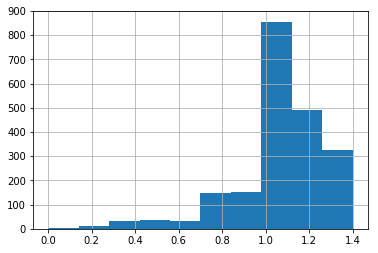

In [103]:
# Ratings distribution
master_clean['rating'].hist();

### Insights:
1. The most retweeted tweet was tweet ID 744234799360020481 with 79515 retweet count. It was a doggo with no name identified in the tweet. His photo shows that he is indeed a labrador retriver as the first prediction stated. The tweet's text says "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4" ![Alt text](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

2. The top 5 most frequent breed of dogs predicted by the algorithm were golden retriever, labrador retriever, prembroke, chihuahua and pug and all of them are really dog breeds. We can also see the most frequent names: Charlie and Lucy (see visualizations below).

3. The mean rating for dogs was 1.06 meaning that the dogs received on average at least full points (for example 10/10) and we see that there were many of them that were overrated according to the unique rating system from WeRateDogs. In conclusion, we got many good dogs!  

### Visualization

''

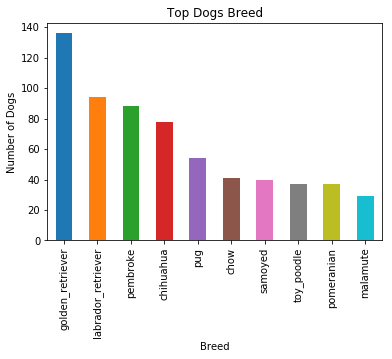

In [104]:
#Top breed predicted by the algorithm
breeds = master_clean['p1'].value_counts()[:10].plot(kind='bar')
breeds.set_title("Top Dogs Breed")
breeds.set_xlabel("Breed")
breeds.set_ylabel("Number of Dogs")
;

''

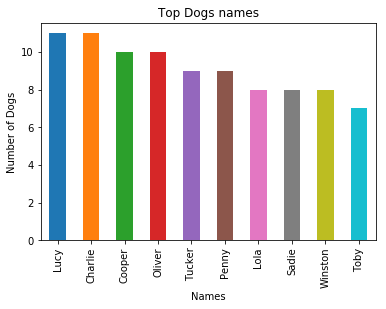

In [105]:
#Top dog's names
names=master_clean['name'].value_counts()[:10].plot(kind='bar')
names.set_title("Top Dogs names")
names.set_xlabel("Names")
names.set_ylabel("Number of Dogs")

;

## Supporting Sources
- https://stackoverflow.com/questions/49673345/python-pandas-get-rows-of-a-dataframe-where-a-column-is-not-null
- https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe
- https://knowledge.udacity.com/questions/110847
- https://stackoverflow.com/questions/57112352/concatenate-two-columns-in-pandas-with-nan